# Hitters Dataset Homework

## Linear Regression Models

In [1]:
import warnings
warnings.simplefilter(action='ignore')
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, ElasticNet, Lasso, LassoCV,ElasticNetCV
import seaborn as sns

In [2]:
hitters = pd.read_csv('../input/hitters/Hitters.csv')

In [3]:
df = hitters.copy()

In [4]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [5]:
df["League"].value_counts()

A    175
N    147
Name: League, dtype: int64

In [6]:
df["NewLeague"].value_counts()

A    176
N    146
Name: NewLeague, dtype: int64

In [7]:
df["Division"].value_counts()

W    165
E    157
Name: Division, dtype: int64

In [8]:
df = pd.get_dummies(df, columns = ['League', 'Division', 'NewLeague'], drop_first = True)
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20,NaN,0,0,0
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0,1,1,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0,0,1,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0,1,0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5,1,0,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AtBat        322 non-null    int64  
 1   Hits         322 non-null    int64  
 2   HmRun        322 non-null    int64  
 3   Runs         322 non-null    int64  
 4   RBI          322 non-null    int64  
 5   Walks        322 non-null    int64  
 6   Years        322 non-null    int64  
 7   CAtBat       322 non-null    int64  
 8   CHits        322 non-null    int64  
 9   CHmRun       322 non-null    int64  
 10  CRuns        322 non-null    int64  
 11  CRBI         322 non-null    int64  
 12  CWalks       322 non-null    int64  
 13  PutOuts      322 non-null    int64  
 14  Assists      322 non-null    int64  
 15  Errors       322 non-null    int64  
 16  Salary       263 non-null    float64
 17  League_N     322 non-null    uint8  
 18  Division_W   322 non-null    uint8  
 19  NewLeagu

In [10]:
df.corr()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
AtBat,1.000000,0.967939,0.592198,0.913060,0.820539,0.669845,0.047372,0.235526,0.252717,0.236659,0.266534,0.244053,0.166123,0.317550,0.353824,0.352117,0.394771,-0.101663,-0.045441,-0.057655
Hits,0.967939,1.000000,0.562158,0.922187,0.811073,0.641211,0.044767,0.227565,0.255815,0.202712,0.261787,0.232005,0.151818,0.310673,0.320455,0.310038,0.438675,-0.101038,-0.071143,-0.060608
HmRun,0.592198,0.562158,1.000000,0.650988,0.855122,0.481014,0.116318,0.221882,0.220627,0.493227,0.262361,0.351979,0.233154,0.282923,-0.106329,0.039318,0.343028,-0.177258,-0.017206,-0.166044
Runs,0.913060,0.922187,0.650988,1.000000,0.798206,0.732213,0.004541,0.186497,0.204830,0.227913,0.250556,0.205976,0.182168,0.279347,0.220567,0.240475,0.419859,-0.150392,-0.076311,-0.115446
RBI,0.820539,0.811073,0.855122,0.798206,1.000000,0.615997,0.146168,0.294688,0.308201,0.441771,0.323285,0.393184,0.250914,0.343186,0.106591,0.193370,0.449457,-0.145597,-0.075531,-0.120124
Walks,0.669845,0.641211,0.481014,0.732213,0.615997,1.000000,0.136475,0.277175,0.280671,0.332473,0.338478,0.308631,0.424507,0.299515,0.149656,0.129382,0.443867,-0.045337,-0.059086,-0.020029
Years,0.047372,0.044767,0.116318,0.004541,0.146168,0.136475,1.000000,0.920289,0.903631,0.726872,0.882877,0.868812,0.838533,-0.004684,-0.080638,-0.162140,0.400657,-0.047261,0.021126,-0.042919
CAtBat,0.235526,0.227565,0.221882,0.186497,0.294688,0.277175,0.920289,1.000000,0.995063,0.798836,0.983345,0.949219,0.906501,0.062283,0.002038,-0.066922,0.526135,-0.028738,0.022965,-0.016502
CHits,0.252717,0.255815,0.220627,0.204830,0.308201,0.280671,0.903631,0.995063,1.000000,0.783306,0.984609,0.945141,0.890954,0.076547,-0.002523,-0.062756,0.548910,-0.025790,0.013584,-0.010047
CHmRun,0.236659,0.202712,0.493227,0.227913,0.441771,0.332473,0.726872,0.798836,0.783306,1.000000,0.820243,0.929484,0.799983,0.112724,-0.158511,-0.138115,0.524931,-0.098383,0.006783,-0.097461


### Outlier Analysis 

In [11]:
df = df.select_dtypes(include = ['float64', 'int64']) 
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20,NaN
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5


In [12]:
for feature in ["Salary"]:

    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR

    if df[(df[feature] > upper) | (df[feature] < lower)].any(axis=None):
        print(feature,"yes")
        print(df[(df[feature] > upper) | (df[feature] < lower)].shape[0])
    else:
        print(feature, "no")

Salary yes
11


In [13]:
df_salary = df["Salary"]

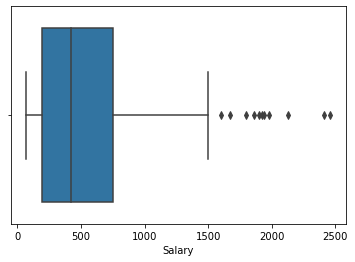

In [14]:
sns.boxplot(x = df_salary);

In [15]:
df['Salary'].describe()

count     263.000000
mean      535.925882
std       451.118681
min        67.500000
25%       190.000000
50%       425.000000
75%       750.000000
max      2460.000000
Name: Salary, dtype: float64

In [16]:
df_outlier = (df[feature] > upper) | (df[feature] < lower)
df = df[~df_outlier]

In [17]:
y = df["Salary"]
X = df.drop('Salary', axis=1)

In [18]:
y = y.fillna(y.mean())

In [19]:
cols = X.columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.20, random_state = 46)

In [21]:
X_train.shape

(248, 16)

In [22]:
X_test.shape

(63, 16)

# Linear Regression

In [23]:
reg_model = LinearRegression()
reg_model.fit(X_train,y_train)
y_pred = reg_model.predict(X_train)
y_test_pred = reg_model.predict(X_test)
Linear_RMSE = np.sqrt(mean_squared_error(y_test, y_test_pred))
print('Linear_RMSE=', Linear_RMSE)

289.1763095901452

# Ridge Regression

In [24]:
ridge_model = Ridge().fit(X_train,y_train)
y_pred = ridge_model.predict(X_test)
Ridg_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print('Ridg_RMSE=',Ridg_RMSE)

286.5320219541146

#### Model Tuning

In [25]:
alpha = [0.1,0.01,0.001,0.2,0.3,0.5,0.8,0.9,1]
ridge_cv = RidgeCV(alphas = alpha, cv=10, normalize = True)
ridge_cv.fit(X_train,y_train)
print('alpha =', ridge_cv.alpha_)
ridge_tuned = Ridge(alpha = ridge_cv.alpha_, normalize = True).fit(X_train,y_train)
Ridge_RMSE = np.sqrt(mean_squared_error(y_test, ridge_tuned.predict(X_test)))
print('Ridge_RMSE=' ,Ridge_RMSE)

alpha = 0.1
Ridge_RMSE= 279.452741410163


# Lasso Regression

In [26]:
lasso_model = Lasso().fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
Lass_RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
print('Lass_RMSE=',Lass_RMSE) 

284.40558654850946

#### Model Tuning 

In [27]:
alpha = [0.1,0.01,0.001,0.2,0.3,0.5,0.8,0.9,1]
lasso_cv = LassoCV(alphas = alpha, cv=10, max_iter = 10000, normalize = True)
lasso_cv.fit(X_train,y_train)
print('alpha=', lasso_cv.alpha_)
lasso_tuned = Lasso(alpha = lasso_cv.alpha_, normalize = True).fit(X_train,y_train)
Lasso_RMSE = np.sqrt(mean_squared_error(y_test, lasso_tuned.predict(X_test)))
print('Lasso_RMSE=',Lasso_RMSE )

alpha= 0.3
Lasso_RMSE= 278.35472136553807


# ElasticNet Reg.

In [28]:
elasticnet_model = ElasticNet().fit(X_train,y_train)
y_pred = elasticnet_model.predict(X_test)
Ent_RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
print('Ent_RMSE=',Ent_RMSE)

273.7982321356293

#### Model Tuning

In [29]:
alpha = [0.1,0.01,0.001,0.2,0.3,0.5,0.8,0.9,1]
enet_cv_model = ElasticNetCV(alphas = alpha, cv=10, max_iter = 10000, normalize = True)
enet_cv_model.fit(X_train,y_train)
print('alpha=', enet_cv_model.alpha_)
enet_tuned = ElasticNet(alpha = enet_cv_model.alpha_).fit(X_train, y_train)
y_pred = enet_tuned.predict(X_test)
Enet_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print('Enet_RMSE =',Enet_RMSE )

alpha= 0.001
Enet_RMSE = 288.32260720336205


# Non_Linear Regression Models

In [30]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR

# KNN

In [31]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
KN_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print('KN_RMSE =',KN_RMSE)

255.3403897185632

### Model Tuning

In [32]:
knn_params = {"n_neighbors": np.arange(2,30,1)}
knn_model = KNeighborsRegressor()
knn_cv_model = GridSearchCV(knn_model, knn_params, cv = 10).fit(X_train, y_train)
print('Best_params = ', knn_cv_model.best_params_)
knn_tuned = KNeighborsRegressor(**knn_cv_model.best_params_).fit(X_train, y_train)
y_pred = knn_tuned.predict(X_test)
KNN_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print('KNN_RMSE =', KNN_RMSE)

Best_params =  {'n_neighbors': 17}
KNN_RMSE = 257.1321967743168


# SVR 

In [33]:
svr_model = SVR("linear").fit(X_train, y_train)
y_pred = svr_model.predict(X_test)
Svr_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print('Svr_RMSE=',Svr_RMSE)

288.02641522857607

# SVR Tuning

### SVR Linear Tuned

In [34]:
svr_model = SVR("linear") 
svr_params = {"C": [0.01,0.001, 0.2, 0.1,0.5,0.8,0.9,1]}
svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 10, n_jobs = -1, verbose =  2).fit(X_train, y_train)
print('Best_params = ', svr_cv_model.best_params_)
svr_tuned = SVR("linear", C = 0.001).fit(X_train, y_train)
y_pred = svr_tuned.predict(X_test)
SVR_Lin_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print('SVR_Lin_RMSE = ',SVR_Lin_RMSE )

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Best_params =  {'C': 0.8}
SVR_Lin_RMSE =  319.48344795592715


[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  73 out of  80 | elapsed:    1.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    1.7s finished


### SVR Non_linear Tuned

In [35]:
svr_model = SVR() 
svr_params = {"C": [0.01,0.001, 0.2, 0.1,0.5,0.8,0.9,1, 10, 100, 500]}
svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 10, n_jobs = -1, verbose =  2).fit(X_train, y_train)
print('Best_params = ',svr_cv_model.best_params_)
svr_tuned = SVR(**svr_cv_model.best_params_).fit(X_train, y_train)
y_pred = svr_tuned.predict(X_test)
SVR_Nlin_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print('SVR_Nlin_RMSE =',SVR_Nlin_RMSE )

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 11 candidates, totalling 110 fits
Best_params =  {'C': 100}
SVR_Nlin_RMSE = 248.27545595378126


[Parallel(n_jobs=-1)]: Done  93 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:    0.4s finished


# Artificial Neural Network

In [36]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test)
mlp_model = MLPRegressor().fit(X_train_scaled, y_train)
y_pred = mlp_model.predict(X_test_scaled)
np.sqrt(mean_squared_error(y_test, y_pred))

487.06948369606187

### Model Tuning

In [37]:
mlp_params = {"alpha": [0.1, 0.01, 0.02, 0.001, 0.0001], 
             "hidden_layer_sizes": [(10,20), (5,5), (100,100), (1000,100,10)]}
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv = 10, verbose = 2, n_jobs = -1).fit(X_train_scaled, y_train)
print('Best_params= ', mlp_cv_model.best_params_)

mlp_tuned = MLPRegressor(**mlp_cv_model.best_params_).fit(X_train_scaled, y_train)
y_pred = mlp_tuned.predict(X_test_scaled)
print('RMSE Tuned= ', np.sqrt(mean_squared_error(y_test, y_pred)))

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.5min finished


Best_params=  {'alpha': 0.02, 'hidden_layer_sizes': (1000, 100, 10)}
RMSE Tuned=  288.98072951369136


# CART

In [38]:
cart_model = DecisionTreeRegressor(random_state = 52)
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)
CaRT_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print('CaRT_RMSE=',CaRT_RMSE)

313.9691434089746

### Model Tuning

In [39]:
cart_params = {"max_depth": [2,3,4,5,10,20, 100],
              "min_samples_split": [2,10,5,30,50,10]}
cart_model = DecisionTreeRegressor()
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10).fit(X_train, y_train)
print('Best_params= ', cart_cv_model.best_params_)

cart_tuned = DecisionTreeRegressor(**cart_cv_model.best_params_).fit(X_train, y_train)
y_pred = cart_tuned.predict(X_test)
CART_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print('CART_RMSE = ', CART_RMSE)

Best_params=  {'max_depth': 10, 'min_samples_split': 50}
CART_RMSE =  245.17542146298243


In [40]:
!pip install astor

In [41]:
!pip install skompiler
from skompiler import skompile
print(skompile(cart_tuned.predict).to('python/code'))

     |████████████████████████████████| 48 kB 2.3 MB/s eta 0:00:011
  Created wheel for skompiler: filename=SKompiler-0.5.5-py3-none-any.whl size=57146 sha256=fed216cefb508dc42d178b4dd5ca9d08ef209007f24d60d30e71993680590d41
  Stored in directory: /root/.cache/pip/wheels/1f/f6/09/b8aec43d39ab30463488d91526f29ba56155a6a6d61cf69986
Successfully built skompiler
(((360.37539285714286 if x[4] <= -1.1659282445907593 else 135.8627280844156 if
    x[8] <= -0.8063557744026184 else 223.48363744588744) if x[7] <= 
    -0.7561601102352142 else 342.01461980749735) if x[8] <= 
    -0.37298598885536194 else ((435.3433576388888 if x[1] <= 
    0.09821474179625511 else 636.4550029761905) if x[13] <= 
    0.6543328166007996 else 693.3300029761904) if x[0] <= 
    0.3030090183019638 else 641.1112019047619 if x[11] <= 
    0.06745642423629761 else 872.7266596320346)



# Random Forests

In [42]:
rf_model = RandomForestRegressor(random_state = 42).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
Rf_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print("Rf_RMSE=",Rf_RMSE)

235.95367951298022

### Model Tuning

In [43]:
rf_params = {"max_depth": [5,8,10,None],
            "max_features": [2,5,10,15,17],
            "n_estimators": [100,200, 1000],
            "min_samples_split": [2,5,10,20,30]}

rf_cv_model = GridSearchCV(rf_model, rf_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)
print('Best_params= ', rf_cv_model.best_params_)

rf_tuned = RandomForestRegressor(**rf_cv_model.best_params_).fit(X_train, y_train)
y_pred = rf_tuned.predict(X_test)
RF_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print('RF_RMSE=',RF_RMSE)


Fitting 10 folds for each of 300 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   51.6s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed: 17.1min finished


Best_params=  {'max_depth': 5, 'max_features': 2, 'min_samples_split': 10, 'n_estimators': 100}
RF_RMSE= 232.99985730855113


# GBM

In [44]:
gbm_model = GradientBoostingRegressor().fit(X_train, y_train)
y_pred = gbm_model.predict(X_test)
Gbm_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print('Gbm_RMSE=',Gbm_RMSE)

249.39394068659578

### Model Tuning

In [45]:
gbm_params = {"learning_rate": [0.1,0.01, 0.05],
             "max_depth": [3,5,8,9],
             "n_estimators": [100,200,500],
             "subsample": [1,0.4,0.5,0.7],
             "loss": ["ls","lad","quantile"]}

gbm_model = GradientBoostingRegressor().fit(X_train, y_train)
gbm_cv_model = GridSearchCV(gbm_model, 
                            gbm_params, 
                            cv = 10, 
                            n_jobs=-1, 
                            verbose = 2).fit(X, y)
print('Best_params = ', gbm_cv_model.best_params_)

gbm_tuned = GradientBoostingRegressor(**gbm_cv_model.best_params_).fit(X_train, y_train)
y_pred = gbm_tuned.predict(X_test)
GBM_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print('GBM_RMSE=',GBM_RMSE )

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   59.0s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 16.3min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed: 20.1min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 25.8min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed: 28.7min finished


Best_params =  {'learning_rate': 0.05, 'loss': 'lad', 'max_depth': 3, 'n_estimators': 200, 'subsample': 1}
GBM_RMSE= 226.5413610127587


# XGBoost

In [46]:
!pip install xgboost

In [47]:
import xgboost
from xgboost import XGBRegressor

In [48]:
xgb = XGBRegressor().fit(X_train, y_train)
y_pred = xgb.predict(X_test)
XgBoost_GBM = np.sqrt(mean_squared_error(y_test, y_pred))
print('XgBoost_GBM =',XgBoost_GBM )

256.143188231288

### Model Tuning

In [49]:
xgb_params = {"learning_rate": [0.1,0.01,0.5],
             "max_depth": [2,3,4,5,8],
             "n_estimators": [100,200,500],
             "colsample_bytree": [0.4,0.7,1]}
xgb_cv_model  = GridSearchCV(xgb,xgb_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)
print('Best_params= ', xgb_cv_model.best_params_)

xgb_tuned = XGBRegressor(**xgb_cv_model.best_params_).fit(X_train, y_train)
y_pred = xgb_tuned.predict(X_test)
XGBoost_GBM = np.sqrt(mean_squared_error(y_test, y_pred)) 
print('XGBoost_GBM  = ', XGBoost_GBM )

Fitting 10 folds for each of 135 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 686 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done 1252 tasks      | elapsed:   51.9s


Best_params=  {'colsample_bytree': 0.4, 'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 500}
XGBoost_GBM  =  244.64090187270332


[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed:   55.6s finished


# LightGBM

In [50]:
!pip install lightgbm
#conda install -c conda-forge lightgbm

In [51]:
from lightgbm import LGBMRegressor

In [52]:
lgb_model = LGBMRegressor().fit(X_train, y_train)
y_pred = lgb_model.predict(X_test)
LightGbm_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print('LightGbm_RMSE=',LightGbm_RMSE)

259.9034266406011

### Model Tuning

In [53]:
lgb_model = LGBMRegressor()
lgbm_params = {"learning_rate": [0.01,0.001, 0.1, 0.5, 1],
              "n_estimators": [200,500,1000],
              "max_depth": [2,4,6,7,10],
              "colsample_bytree": [1,0.8,0.5,0.4]}
lgbm_cv_model = GridSearchCV(lgb_model, 
                             lgbm_params, 
                             cv = 10, 
                             n_jobs = -1, 
                             verbose =2).fit(X_train, y_train)
print('Best_params= ', lgbm_cv_model.best_params_)

lgbm_tuned = LGBMRegressor(**lgbm_cv_model.best_params_).fit(X_train, y_train)
y_pred = lgbm_tuned.predict(X_test)
LightGBM_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print('LightGBM_RMSE = ',LightGBM_RMSE)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 270 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 473 tasks      | elapsed:   26.2s
[Parallel(n_jobs=-1)]: Done 756 tasks      | elapsed:   43.8s
[Parallel(n_jobs=-1)]: Done 1121 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1584 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2638 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 2993 out of 3000 | elapsed:  2.4min remaining:    0.3s


Best_params=  {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 200}
LightGBM_RMSE =  262.3245594032137


[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed:  2.4min finished


# CatBoost

In [54]:
!pip install catboost


In [55]:
from catboost import CatBoostRegressor

In [56]:
catb_model = CatBoostRegressor(verbose = False).fit(X_train, y_train)
y_pred = catb_model.predict(X_test)
Catb_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print('Catb_RMSE= ',Catb_RMSE)

250.7911912424646

### Model Tuning

In [83]:
catb_params = {"iterations": [200,500,100],
              "learning_rate": [0.01,0.1,0.0001],
              "depth": [3,6,8]}
catb_model = CatBoostRegressor()
catb_cv_model = GridSearchCV(catb_model, 
                           catb_params, 
                           cv = 5, 
                           n_jobs = -1, 
                           verbose = 2).fit(X_train, y_train)
print('Best_params= ', catb_cv_model.best_params_)

catb_tuned = CatBoostRegressor(**catb_cv_model.best_params_).fit(X_train, y_train)
CatB_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print('CatB_RMSE =', CatB_RMSE)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:  1.3min finished


0:	learn: 299.9700850	total: 2.2ms	remaining: 1.1s
1:	learn: 298.4515006	total: 4.02ms	remaining: 1s
2:	learn: 297.0815577	total: 5.71ms	remaining: 946ms
3:	learn: 295.7635800	total: 7.32ms	remaining: 908ms
4:	learn: 294.5076990	total: 8.94ms	remaining: 885ms
5:	learn: 293.1962219	total: 10.5ms	remaining: 867ms
6:	learn: 291.8844628	total: 12.2ms	remaining: 859ms
7:	learn: 290.6143753	total: 13.9ms	remaining: 853ms
8:	learn: 289.2919179	total: 15.5ms	remaining: 845ms
9:	learn: 288.0603640	total: 17.1ms	remaining: 840ms
10:	learn: 286.7930702	total: 18.8ms	remaining: 834ms
11:	learn: 285.6827288	total: 20.4ms	remaining: 830ms
12:	learn: 284.2855000	total: 22.1ms	remaining: 829ms
13:	learn: 282.9151253	total: 23.8ms	remaining: 825ms
14:	learn: 281.7800652	total: 25.6ms	remaining: 828ms
15:	learn: 280.6356752	total: 27.3ms	remaining: 826ms
16:	learn: 279.4054972	total: 29ms	remaining: 823ms
17:	learn: 278.2616170	total: 30.6ms	remaining: 819ms
18:	learn: 277.2103985	total: 32.3ms	remainin

# All Models

In [1]:
result_RMSE = pd.DataFrame({'Base_RMSE':[Linear_RMSE, Ridg_RMSE,Lass_RMSE,Ent_RMSE, KN_RMSE,CaRT_RMSE,Rf_RMSE,Svr_RMSE,Svr_RMSE,Gbm_RMSE,XgBoost_GBM, LightGbm_RMSE,Catb_RMSE],
    'Tuned_RMSE':['X',Ridge_RMSE, Lasso_RMSE, Enet_RMSE, KNN_RMSE, CART_RMSE, RF_RMSE, SVR_Lin_RMSE, SVR_Nlin_RMSE, GBM_RMSE, XGBoost_GBM, LightGBM_RMSE, CatB_RMSE]})
result_RMSE.index = ['Linear','Ridge','Lasso','ENet','KNN','CART','RF','SVR_Lin','SVR_Nlin','GBM','XGBoost','LightGBM','CatBoost']
result_RMSE.T

AttributeError: 'NoneType' object has no attribute 'DataFrame'

## OZET 

Hitters veri seti için gorudugumuz tum  makine öğrenmesi modelini kurup, hata skorlarını minimize etmeye calistim.

#### **1).** Hitters Veri Seti okundu.
#### **2).** Keşifçi Veri Analizi ile;
* veri setinin yapısal bilgilerine bakıldı.
* veri setindeki değişkenlerin tiplerine bakıldı.
* object tipindeki degiskenler incelendi kategorik tipe dönüştürme işlemi yapıldı.

#### **3).** Veri Ön İşleme kısmında; 
* "Salary" de IQR incelemesi yapildi ve bulunan degerler silindi. 
* "Salary" deki eksik veriler ortalama ile dolduruldu
* kategorik değişkenlere one-hot-encoding dönüşümü uygulandı.
* kategorik değişkeni içermeyen ve bağımlı değişkenin(Salary) atılmış hali üzerinden değişken standardizasyonu uygulandı.

#### **4).** Model Kurma aşamasında;

Öğrendiğimiz tum yöntemler icin Base modeller icin RMSE hesaplandi daha sonra hiperparametre optimizasyonları ile bu modeller tune edilerek RMSE degerinin dusurulmesi icin calisildi.